# SUYASH PRATAP SINGH

# TASKS 2:-

Supervised Machine Learning Task

Dataset Link : https://www.kaggle.com/kaushil268/diseaseprediction-using-machine-learning

Perform Visualization Task and make use different algorithms to predict label.

Show at least 3 different Algorithms accuracies with the help of graph.

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import seaborn as sns
sns.set()

In [2]:
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

# Loading the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\KAGGLE\Training.csv',index_col=0)
df.head(19)

skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
itching                                                                    
1                1                     1                    0          0   
0                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
0                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
1                1                     1                    0          0   
0                0                     0                    1          1   
0                0                     0                    0          1   
0                0                     0                    1          0   
0                0                     0                    1          1   
0                0                     0                    1          1   
0                0                     0                    0          1   
0                0                     0                    1          0   
0                0                     0                    1          1   
0                0                     0                    1          1   

         chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
itching                                                                
1             0           0             0        0                 0   
0             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             0           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             1           0             0        0                 0   
0             0           0             0        0                 0   
0             1           0             0        0                 0   

         muscle_wasting  ...  scurring  skin_peeling  silver_like_dusting  \
itching                  ...                                                
1                     0  ...         0             0                    0   
0                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
0                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0                    0   
1                     0  ...         0             0

In [4]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 132


In [5]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature Count {}".format(len(discrete_feature)))

Discrete feature Count 132


In [6]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 0


In [7]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature Count {}".format(len(categorical_feature)))

Categorical feature Count 1


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head(1)

skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
itching                                                                    
1                1                     1                    0          0   

         chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
itching                                                                
1             0           0             0        0                 0   

         muscle_wasting  ...  scurring  skin_peeling  silver_like_dusting  \
itching                  ...                                                
1                     0  ...         0             0                    0   

         small_dents_in_nails  inflammatory_nails  blister  \
itching                                                      
1                           0                   0        0   

         red_sore_around_nose  yellow_crust_ooze         prognosis  \
itching                                                              
1                           0                  0  Fungal infection   

         Unnamed: 133  
itching                
1                 NaN  

[1 rows x 133 columns]

In [10]:
df.dropna(how='all', axis='columns',inplace=True)

# Check Missing Value:

In [11]:
df.isnull().sum()

skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
chills                  0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [12]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

skin_rash               0.0
nodal_skin_eruptions    0.0
continuous_sneezing     0.0
shivering               0.0
chills                  0.0
                       ... 
inflammatory_nails      0.0
blister                 0.0
red_sore_around_nose    0.0
yellow_crust_ooze       0.0
prognosis               0.0
Length: 132, dtype: float64

# Shape of dataset

In [13]:
df.shape

(298, 132)

In [14]:
df.describe()

skin_rash  nodal_skin_eruptions  continuous_sneezing   shivering  \
count  298.000000            298.000000           298.000000  298.000000   
mean     0.130872              0.010067             0.040268    0.013423   
std      0.337828              0.099997             0.196919    0.115270   
min      0.000000              0.000000             0.000000    0.000000   
25%      0.000000              0.000000             0.000000    0.000000   
50%      0.000000              0.000000             0.000000    0.000000   
75%      0.000000              0.000000             0.000000    0.000000   
max      1.000000              1.000000             1.000000    1.000000   

           chills  joint_pain  stomach_pain     acidity  ulcers_on_tongue  \
count  298.000000  298.000000    298.000000  298.000000        298.000000   
mean     0.177852    0.154362      0.033557    0.050336          0.020134   
std      0.383032    0.361904      0.180389    0.219004          0.140696   
min      0.000000    0.000000      0.000000    0.000000          0.000000   
25%      0.000000    0.000000      0.000000    0.000000          0.000000   
50%      0.000000    0.000000      0.000000    0.000000          0.000000   
75%      0.000000    0.000000      0.000000    0.000000          0.000000   
max      1.000000    1.000000      1.000000    1.000000          1.000000   

       muscle_wasting  ...  pus_filled_pimples  blackheads    scurring  \
count      298.000000  ...          298.000000  298.000000  298.000000   
mean         0.013423  ...            0.013423    0.013423    0.013423   
std          0.115270  ...            0.115270    0.115270    0.115270   
min          0.000000  ...            0.000000    0.000000    0.000000   
25%          0.000000  ...            0.000000    0.000000    0.000000   
50%          0.000000  ...            0.000000    0.000000    0.000000   
75%          0.000000  ...            0.000000    0.000000    0.000000   
max          1.000000  ...            1.000000    1.000000    1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count    298.000000           298.000000            298.000000   
mean       0.020134             0.020134              0.020134   
std        0.140696             0.140696              0.140696   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails     blister  red_sore_around_nose  yellow_crust_ooze  
count          298.000000  298.000000            298.000000         298.000000  
mean             0.020134    0.016779              0.016779           0.016779  
std              0.140696    0.128657              0.128657           0.128657  
min              0.000000    0.000000              0.000000           0.000000  
25%              0.000000    0.000000              0.000000           0.000000  
50%              0.000000    0.000000              0.000000           0.000000  
75%              0.000000    0.000000              0.000000           0.000000  
max              1.000000    1.000000              1.000000           1.000000  

[8 rows x 131 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1 to 0
Columns: 132 entries, skin_rash to prognosis
dtypes: int64(131), object(1)
memory usage: 309.6+ KB


# Heatmap

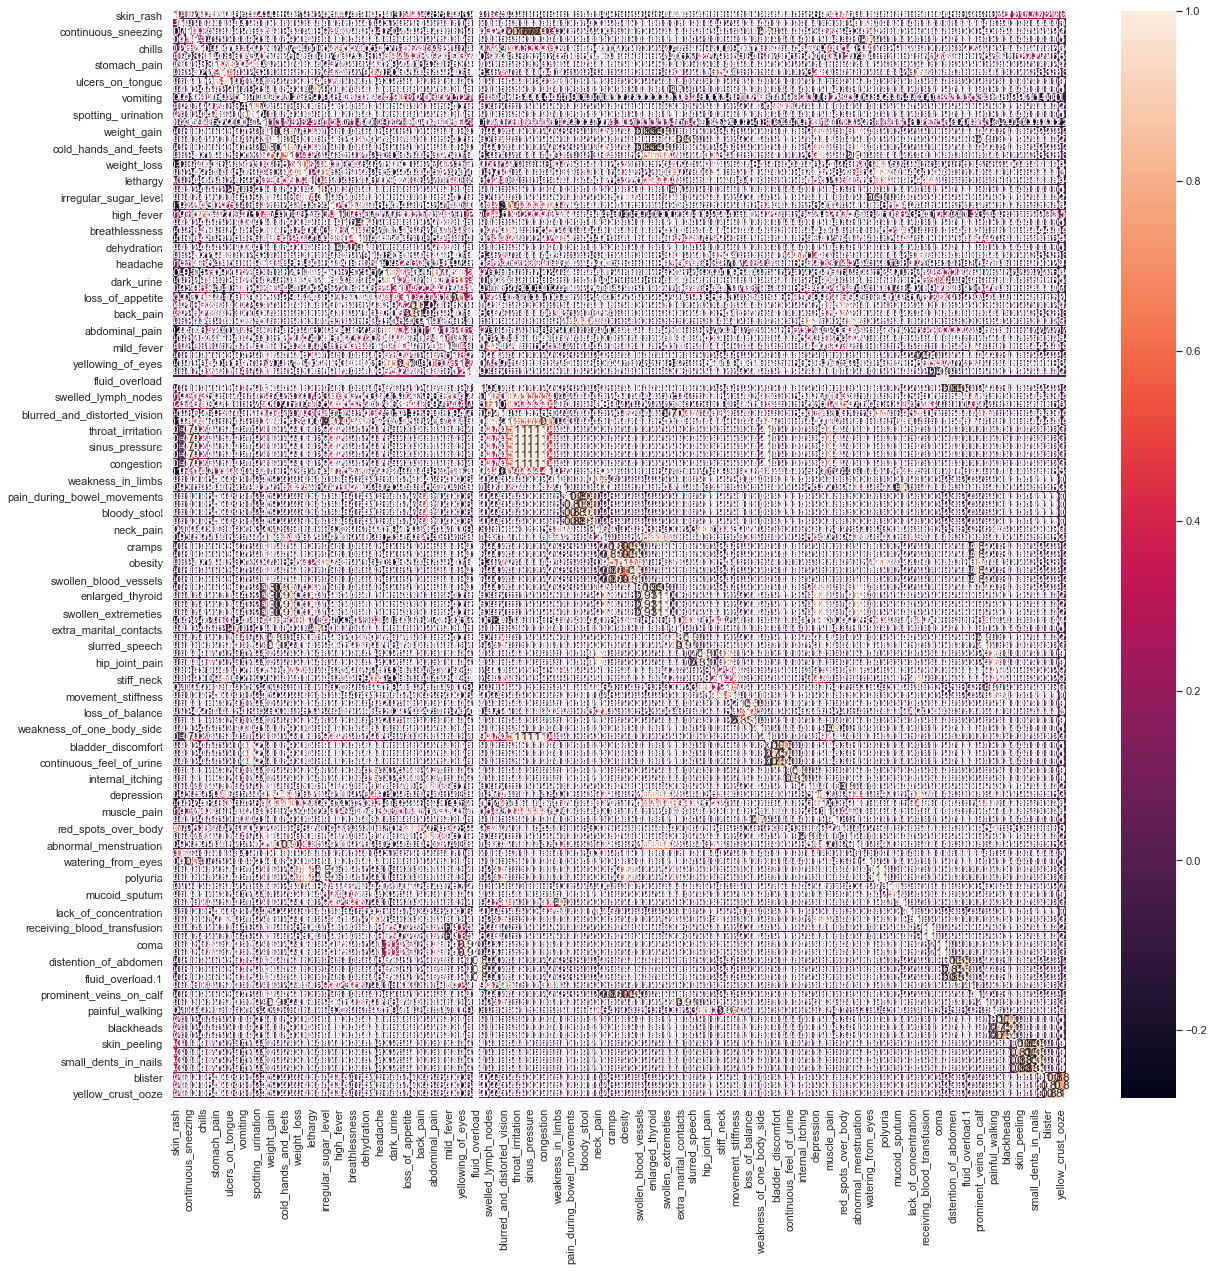

In [16]:
teju = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(teju,annot=True)

In [17]:
df.drop(columns=['prognosis'],inplace = True)

# Distplot

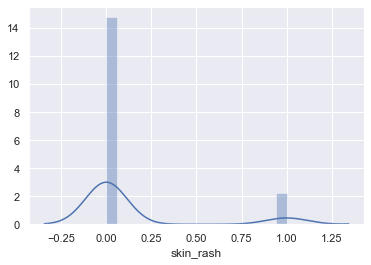

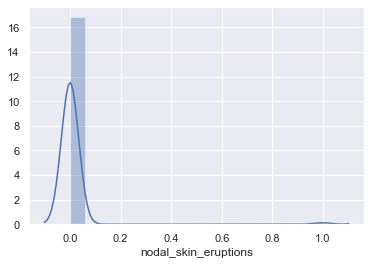

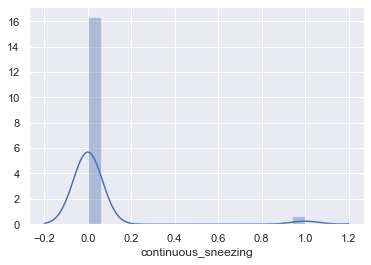

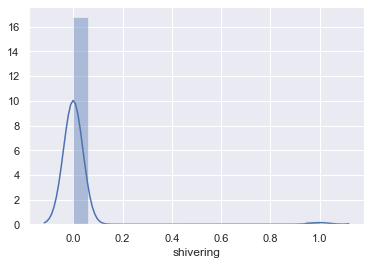

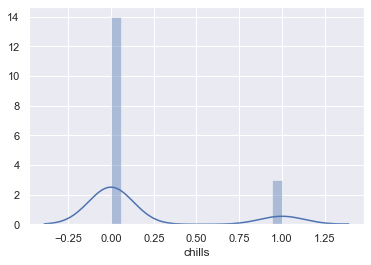

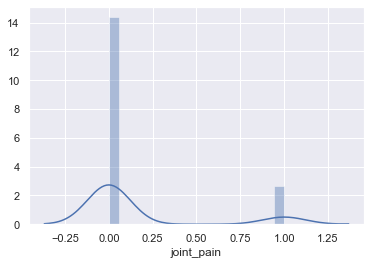

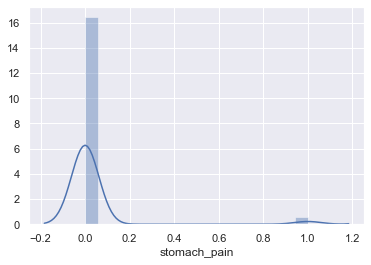

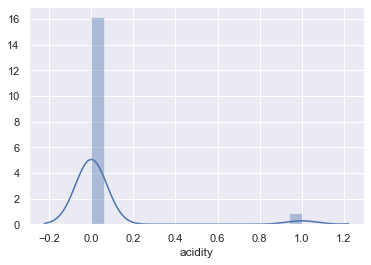

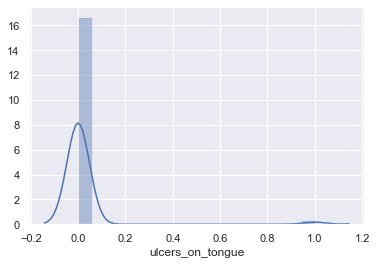

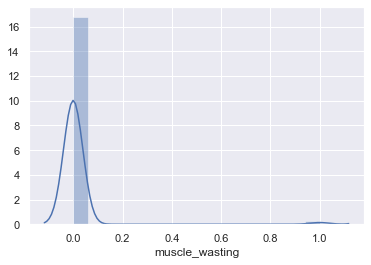

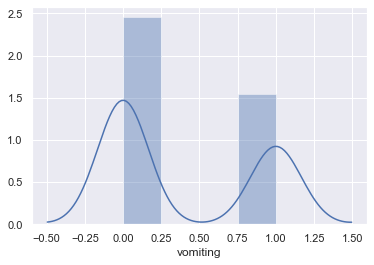

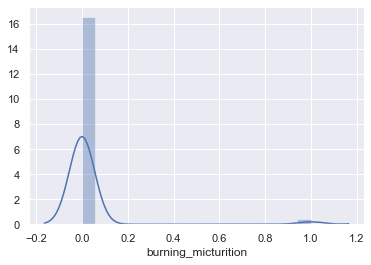

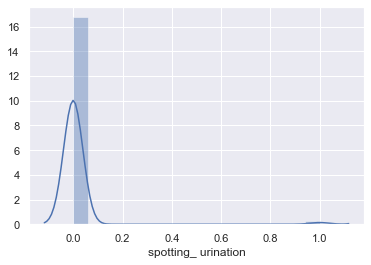

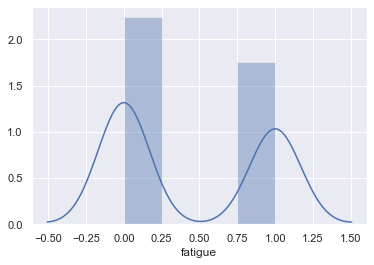

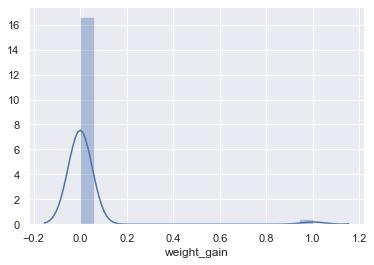

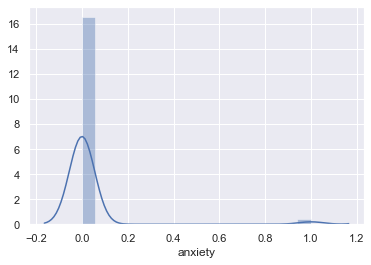

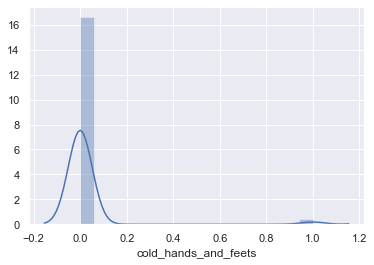

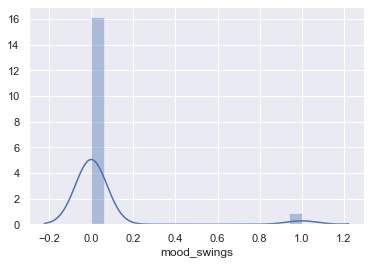

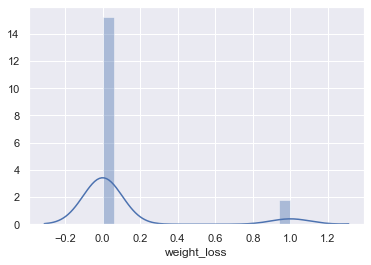

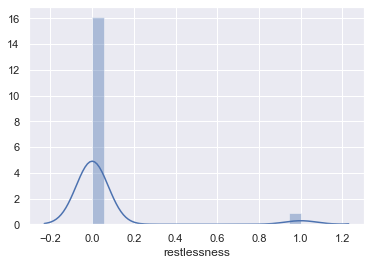

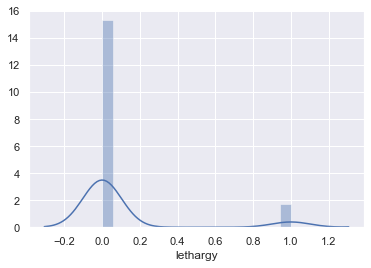

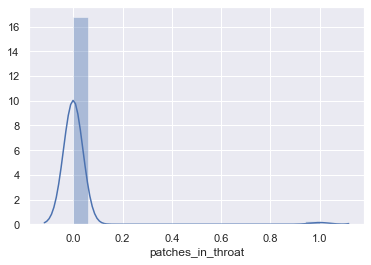

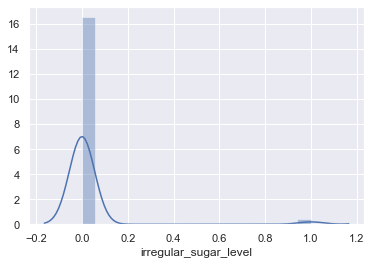

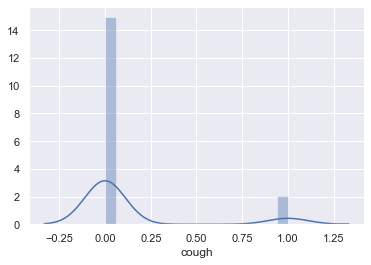

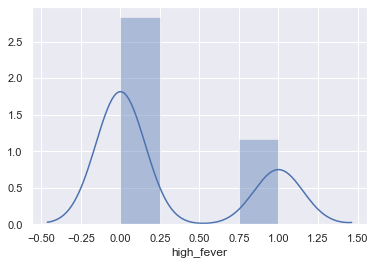

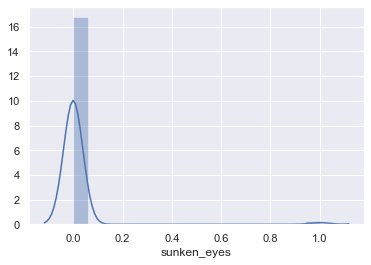

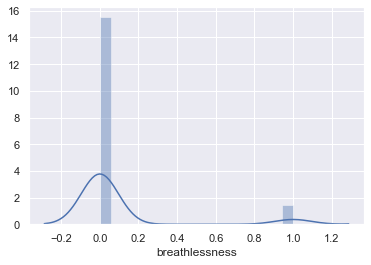

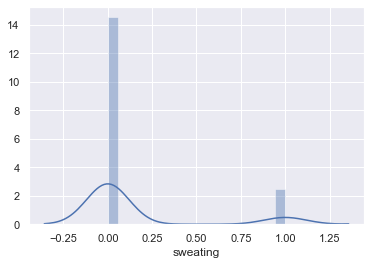

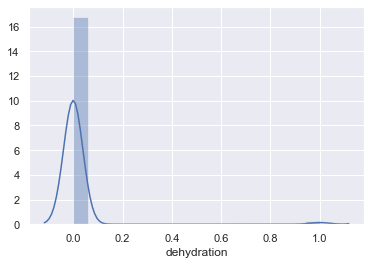

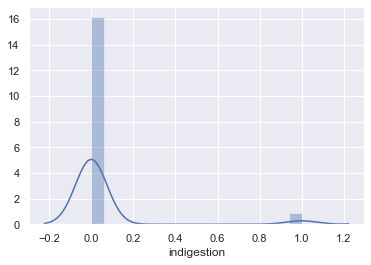

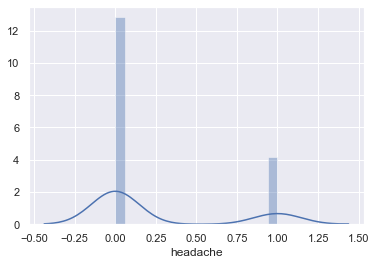

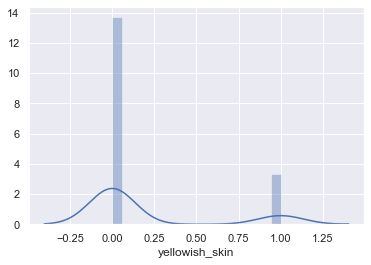

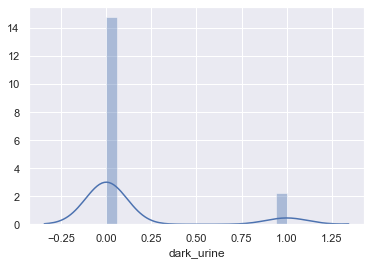

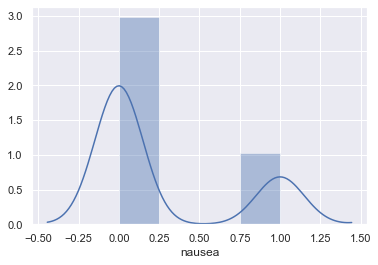

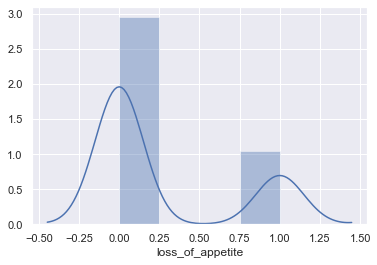

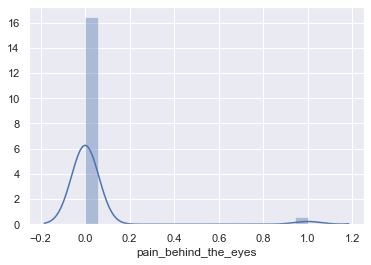

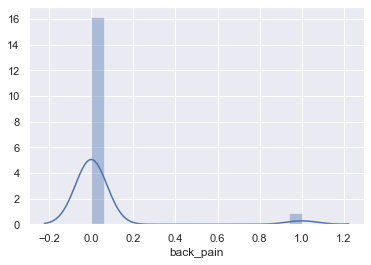

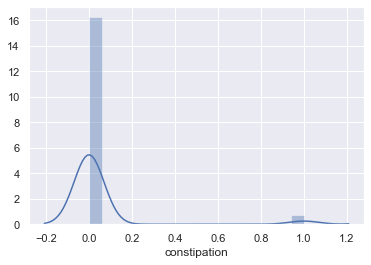

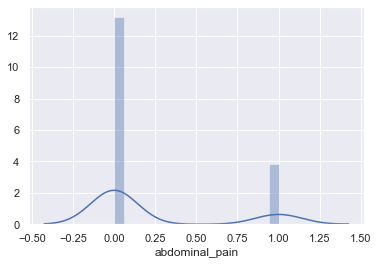

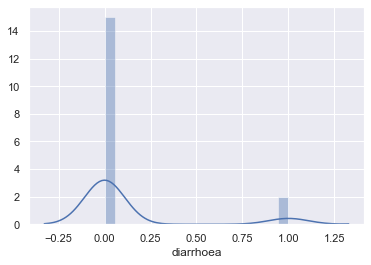

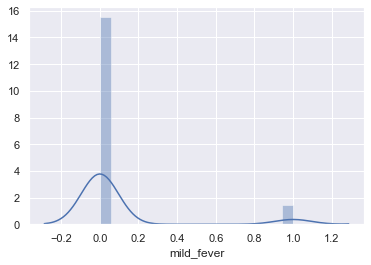

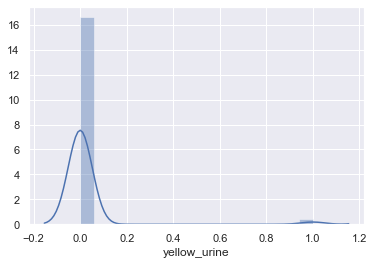

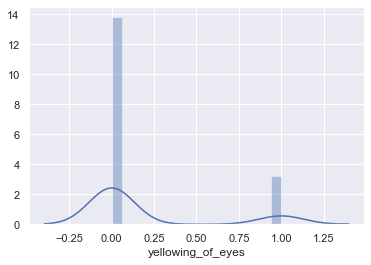

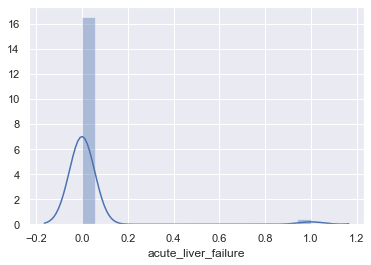

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


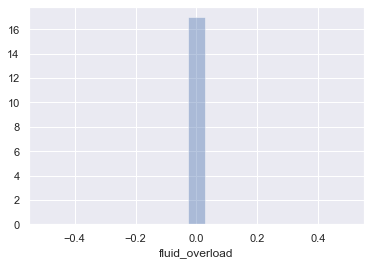

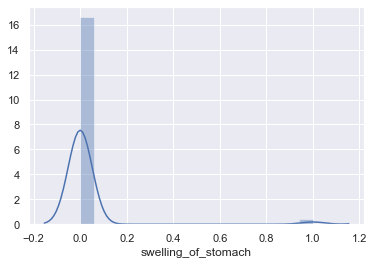

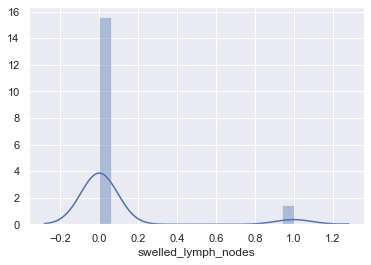

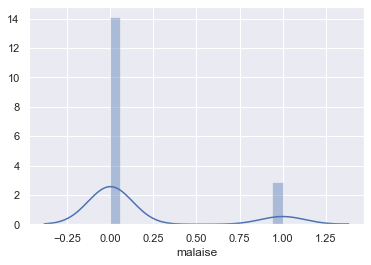

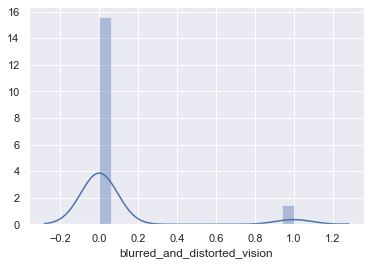

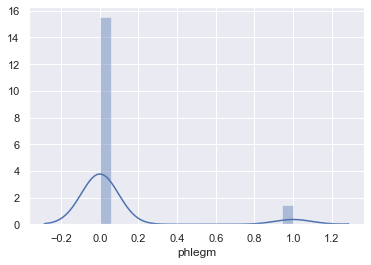

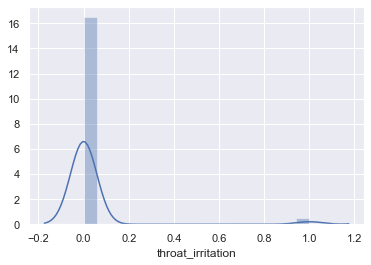

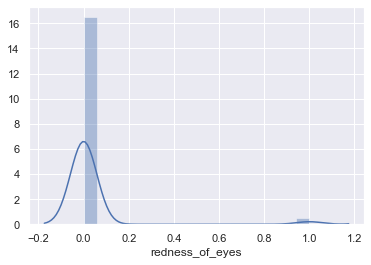

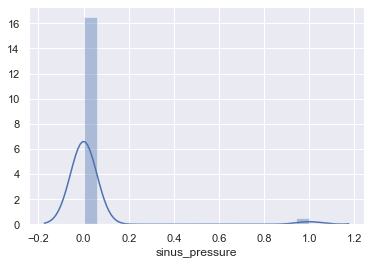

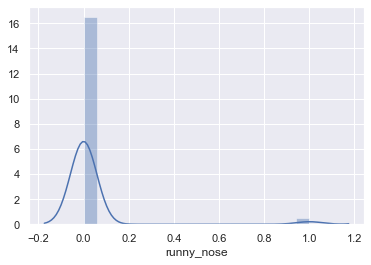

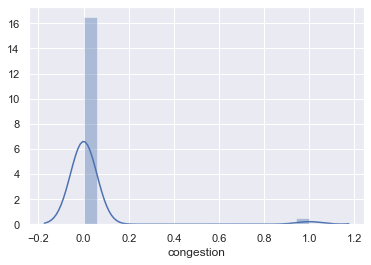

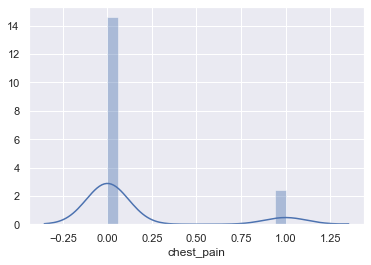

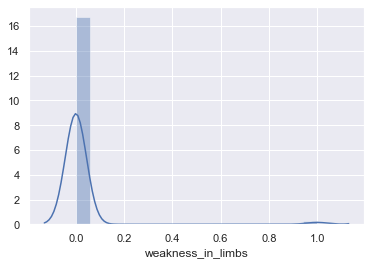

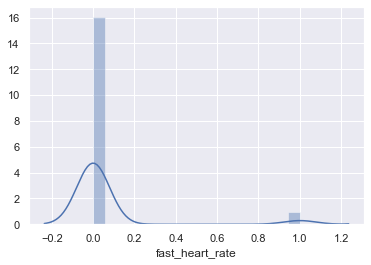

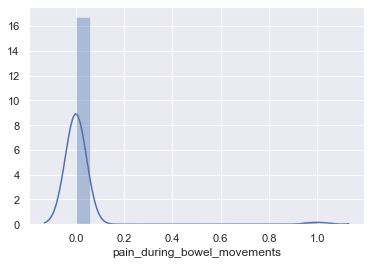

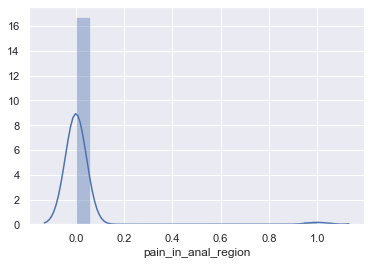

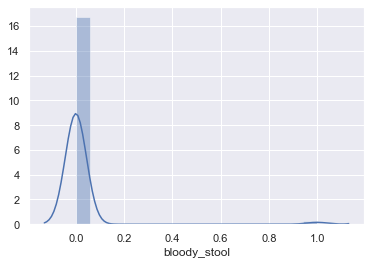

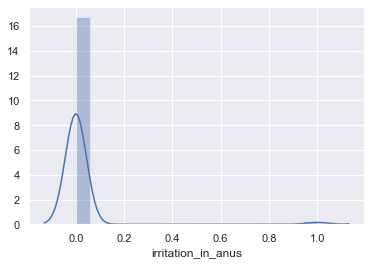

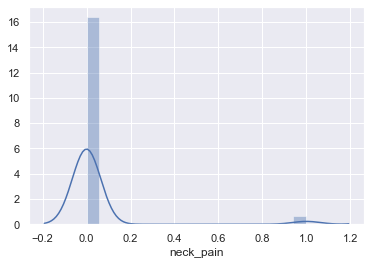

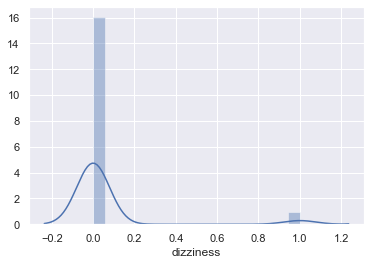

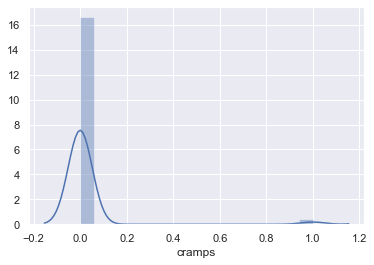

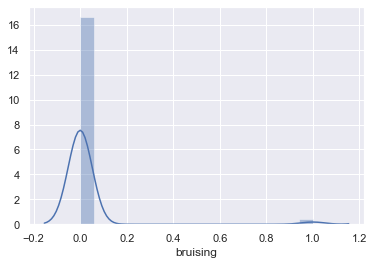

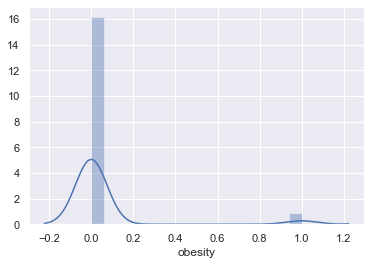

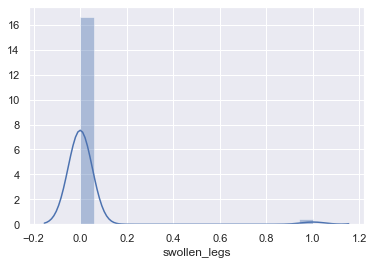

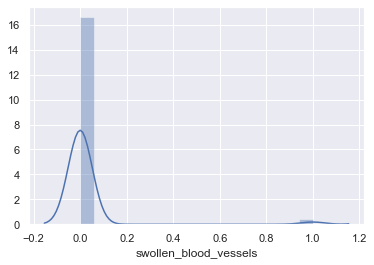

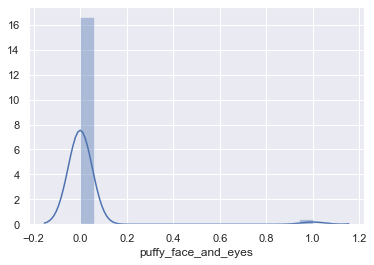

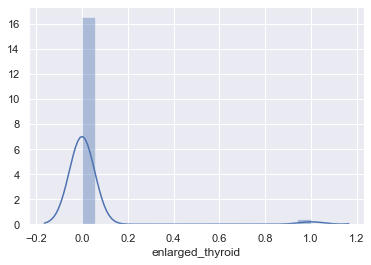

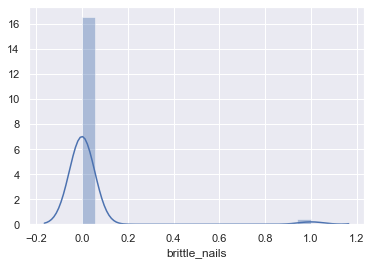

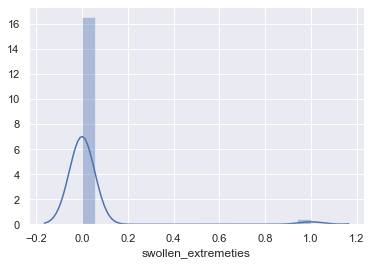

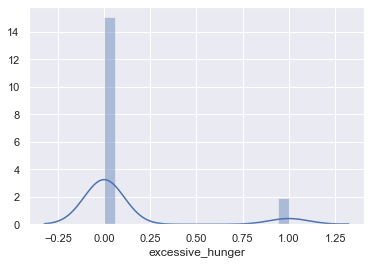

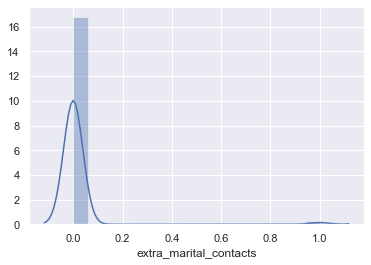

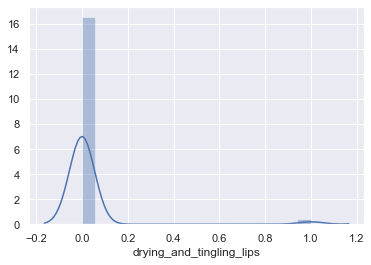

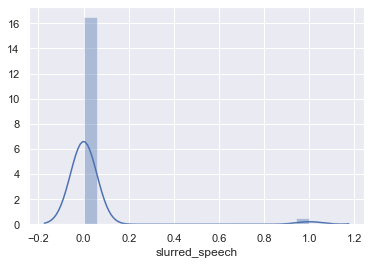

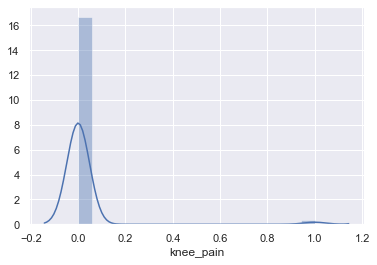

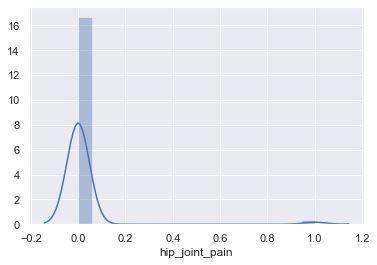

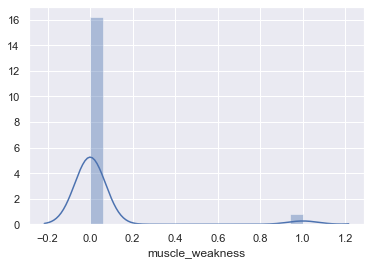

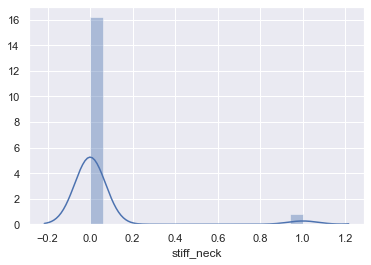

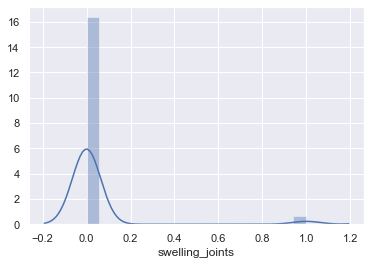

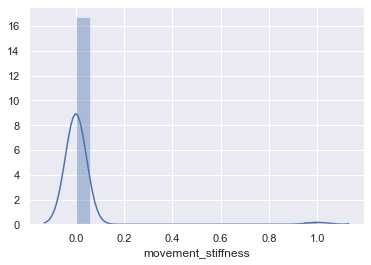

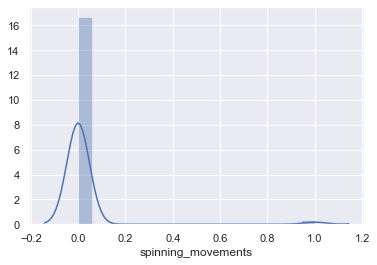

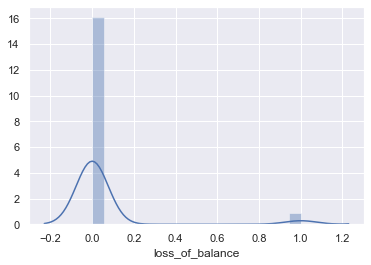

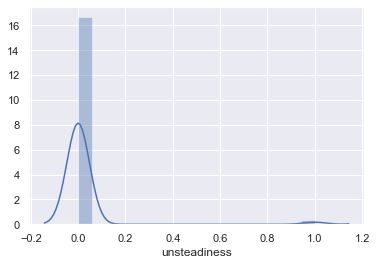

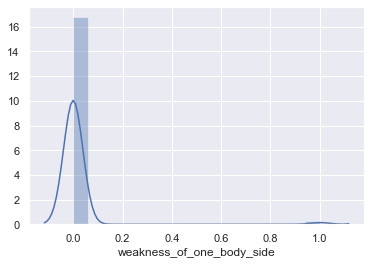

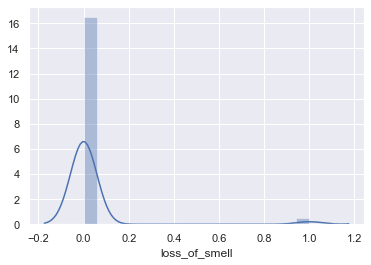

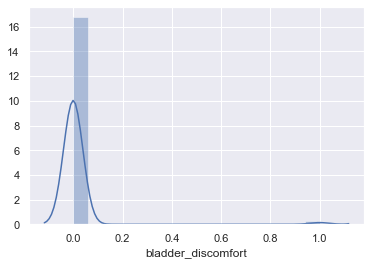

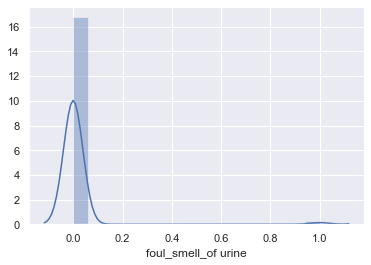

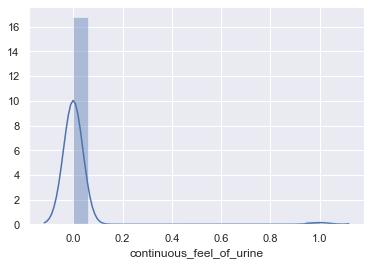

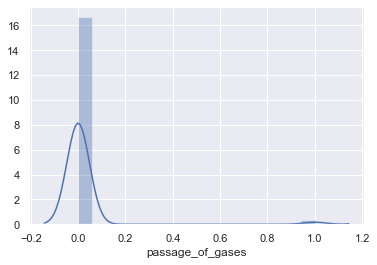

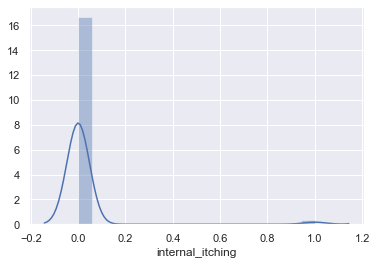

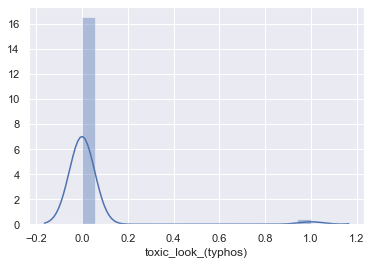

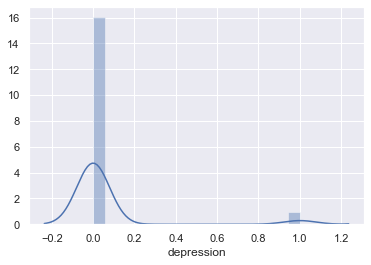

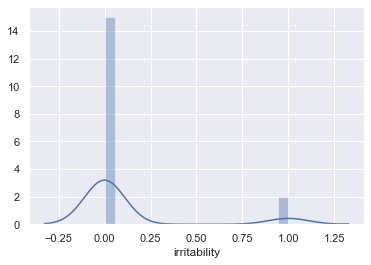

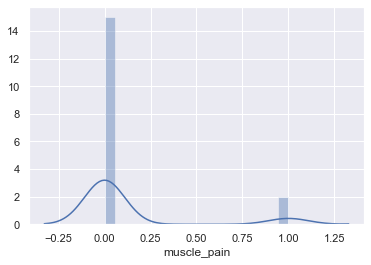

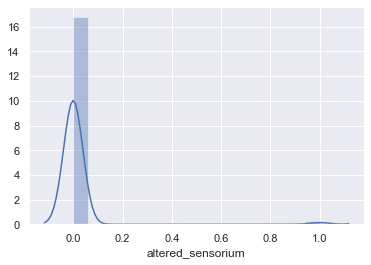

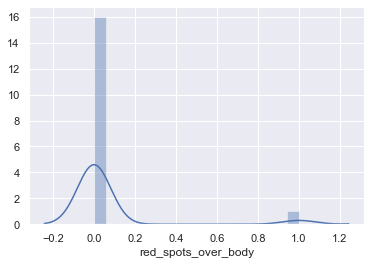

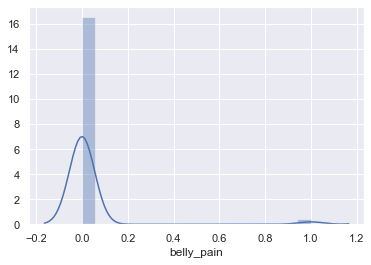

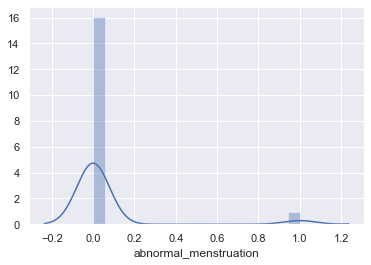

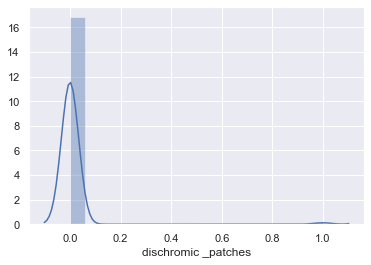

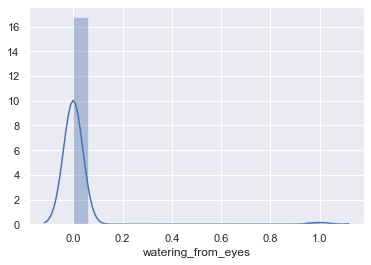

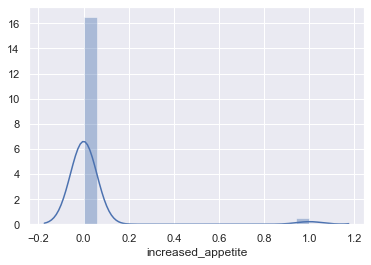

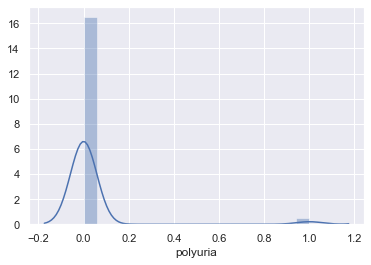

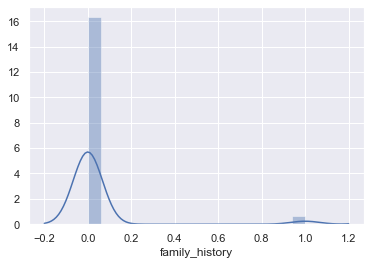

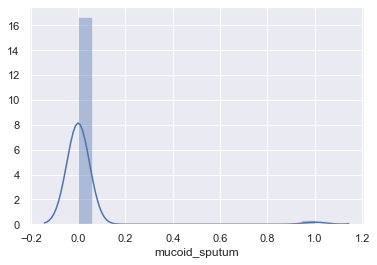

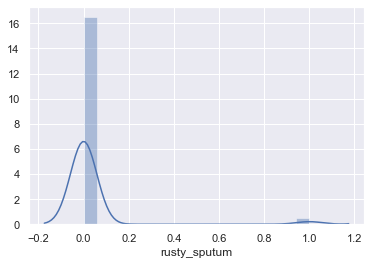

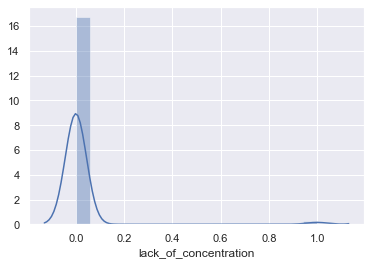

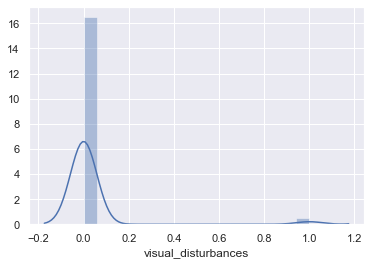

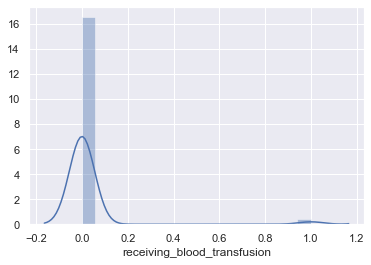

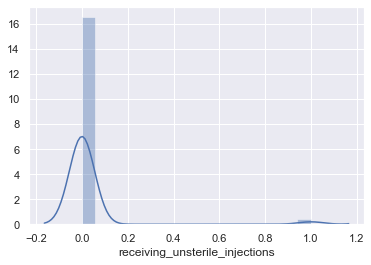

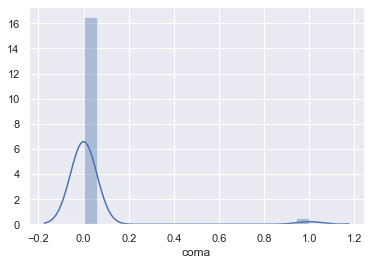

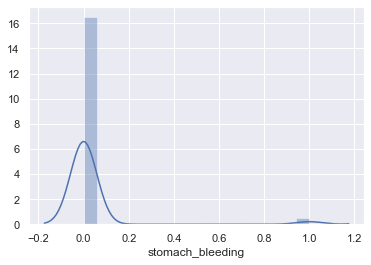

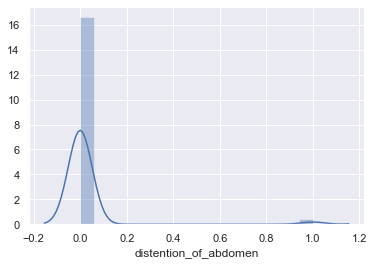

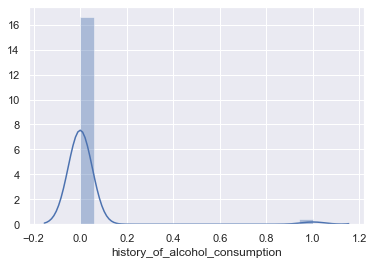

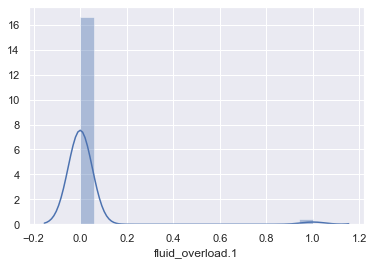

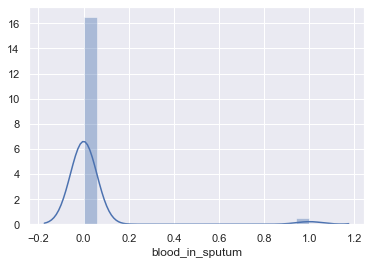

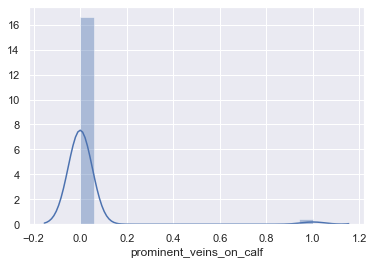

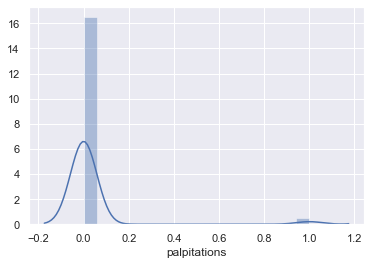

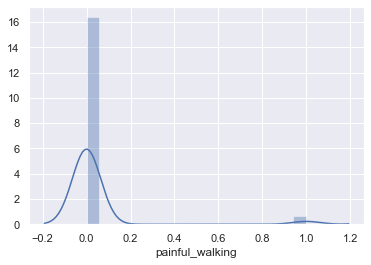

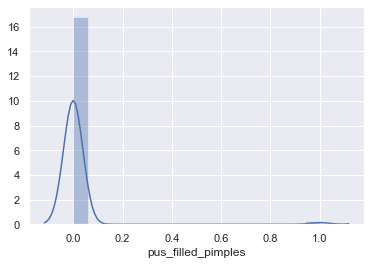

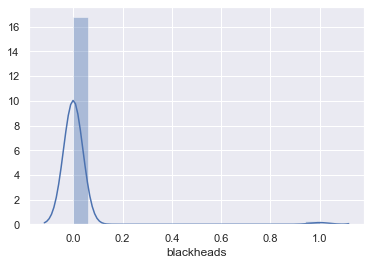

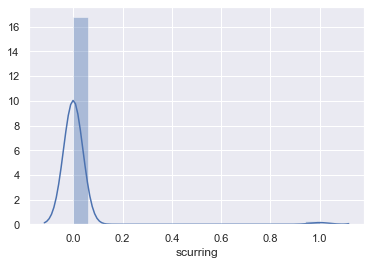

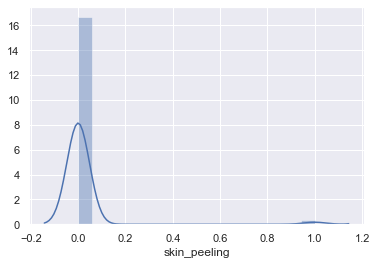

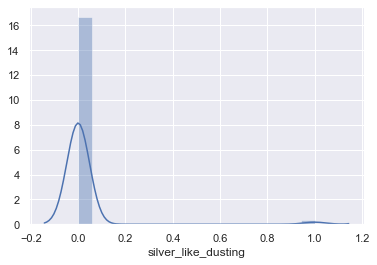

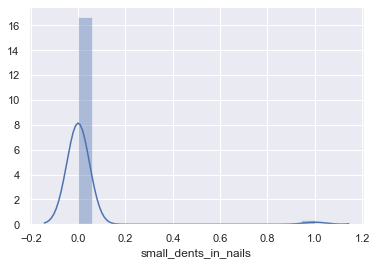

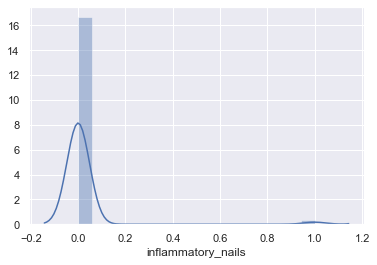

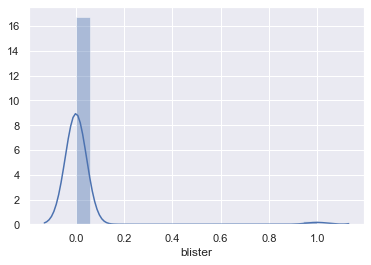

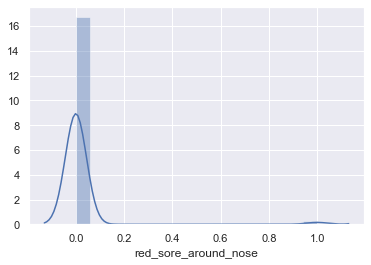

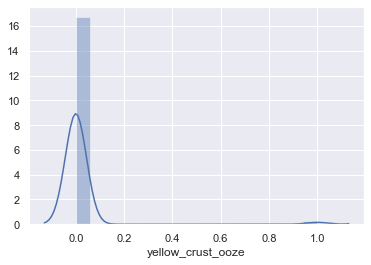

In [18]:
df_feature = df.columns

for feature in df_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

# Histogram Plot

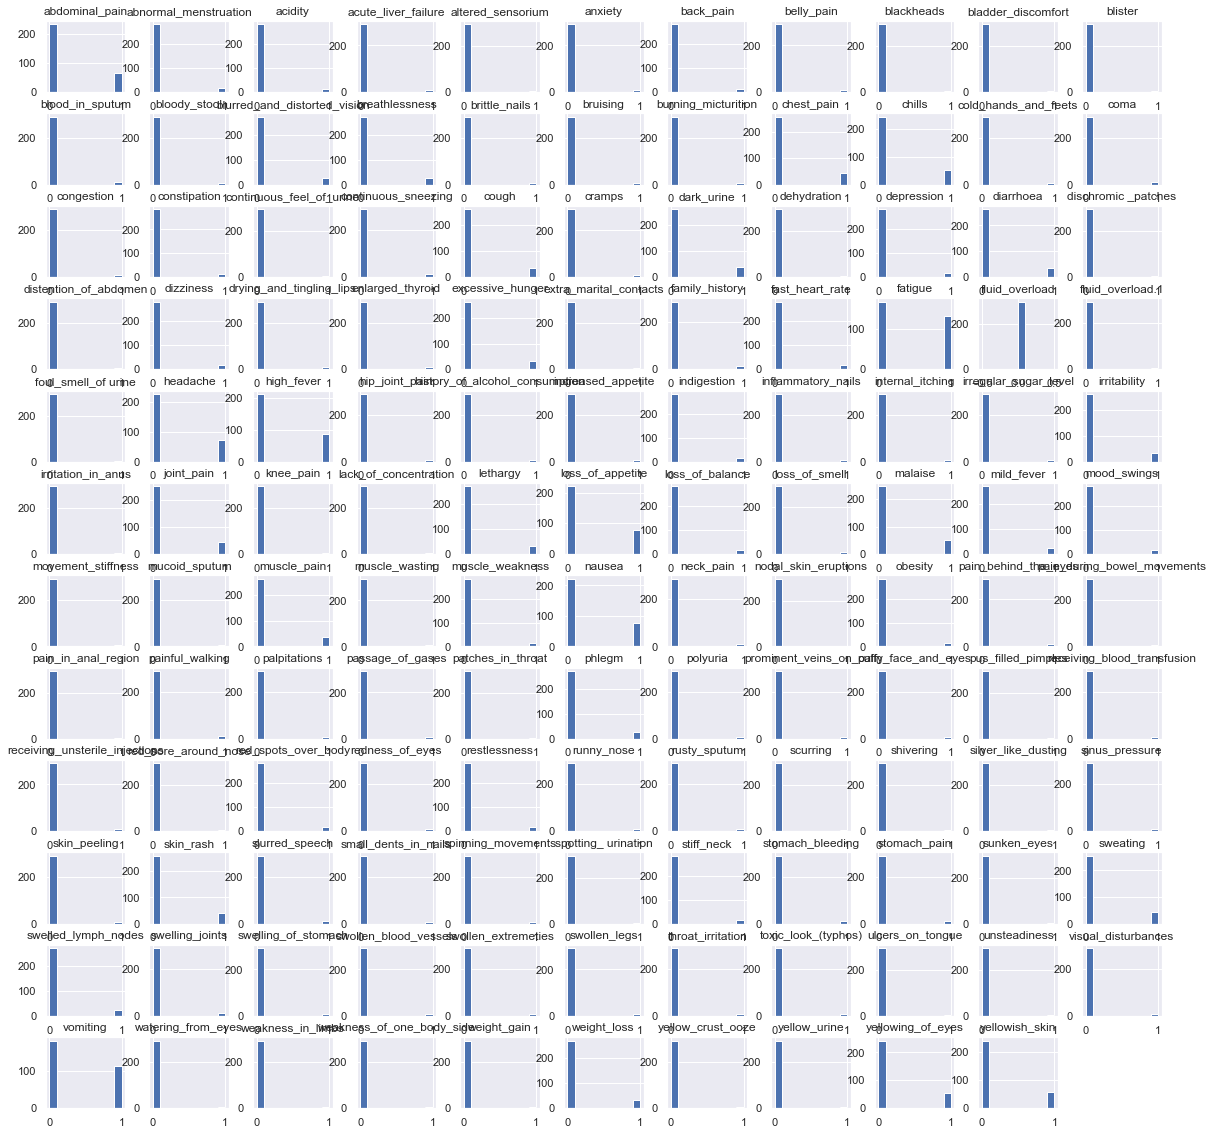

In [19]:
p = df.hist(figsize = (20,20))

# ScatterPlot

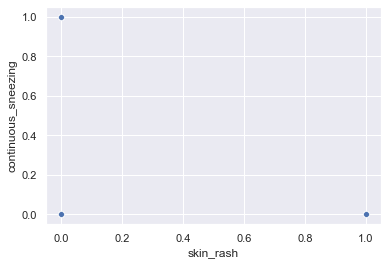

In [20]:
kp =sns.scatterplot(x= "skin_rash" ,y= "continuous_sneezing",data=df)

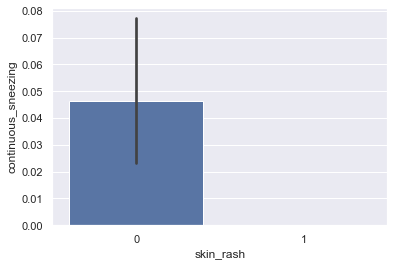

In [21]:
kp1 =sns.barplot(x= "skin_rash" ,y= "continuous_sneezing",data=df)

# BOXPLOT

<AxesSubplot:>

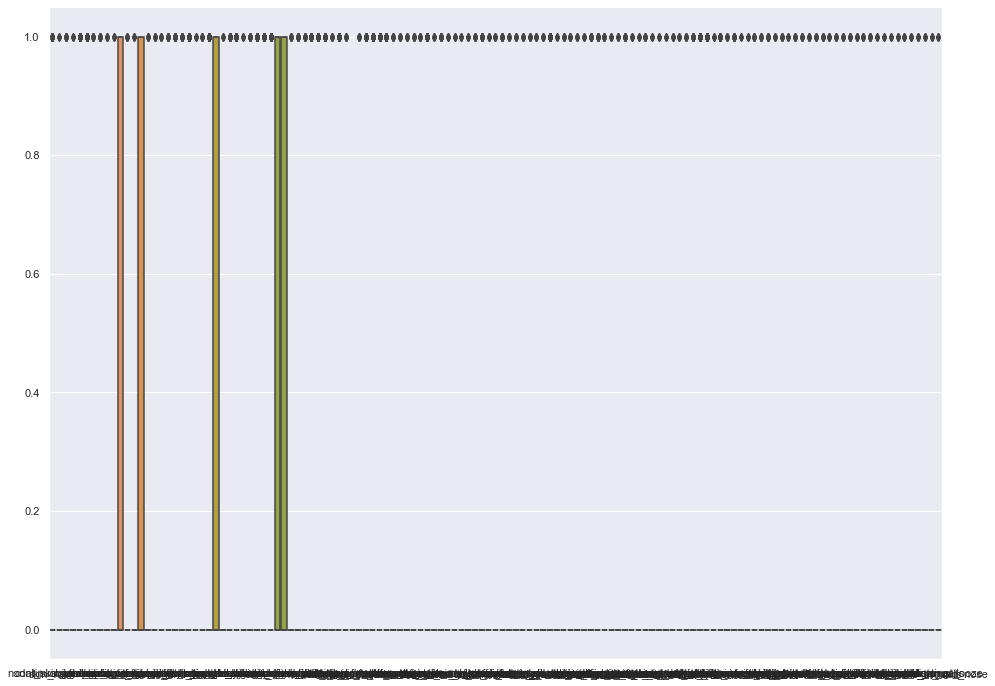

In [22]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

# PIECHART

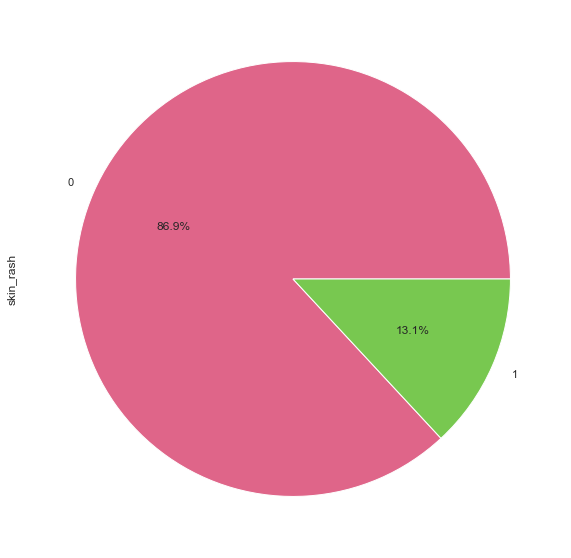

In [23]:
colors =  ["#DF6589FF", "#78C850","#FC766AFF"]
ax= df['skin_rash'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10)) 
plt.show()

# JOINTPLOT

<Figure size 1152x864 with 0 Axes>

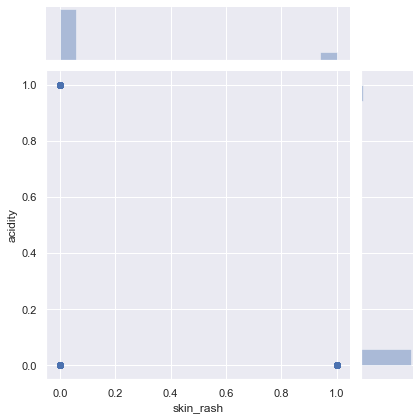

In [24]:
plt.figure(figsize=(16,12))
sns.jointplot(x='skin_rash',y='acidity',data=df)

# Density plot

<AxesSubplot:xlabel='skin_rash', ylabel='acidity'>

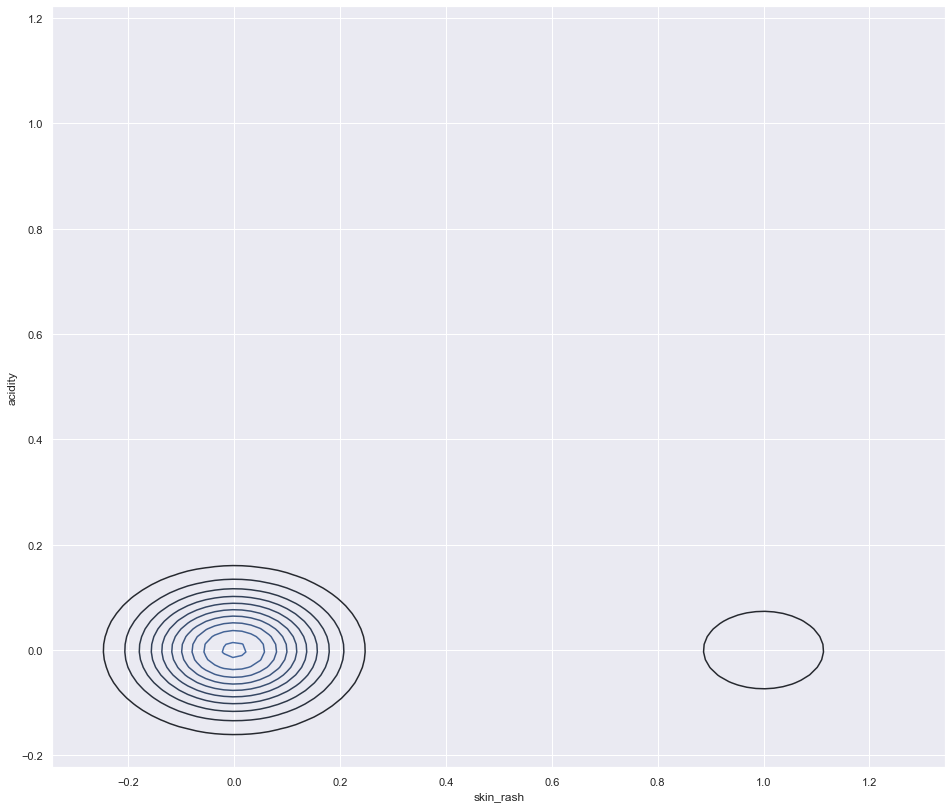

In [25]:
plt.figure(figsize=(16,14))
sns.kdeplot(df.skin_rash, df.acidity)

# Training the dataset

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
X.head()

skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
itching                                                                    
1                1                     1                    0          0   
1                0                     1                    0          0   
1                1                     0                    0          0   
1                1                     1                    0          0   
0                0                     0                    1          1   

         chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
itching                                                                
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
1             0           0             0        0                 0   
0             1           0             0        0                 0   

         muscle_wasting  ...  painful_walking  pus_filled_pimples  blackheads  \
itching                  ...                                                    
1                     0  ...                0                   0           0   
1                     0  ...                0                   0           0   
1                     0  ...                0                   0           0   
1                     0  ...                0                   0           0   
0                     0  ...                0                   0           0   

         scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
itching                                                                      
1               0             0                    0                     0   
1               0             0                    0                     0   
1               0             0                    0                     0   
1               0             0                    0                     0   
0               0             0                    0                     0   

         inflammatory_nails  blister  red_sore_around_nose  
itching                                                     
1                         0        0                     0  
1                         0        0                     0  
1                         0        0                     0  
1                         0        0                     0  
0                         0        0                     0  

[5 rows x 130 columns]

In [29]:
y.head()

itching
1    0
1    0
1    0
1    0
0    0
Name: yellow_crust_ooze, dtype: int64

# Splitting the dataset into training and testing phase

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the dataset into various models:-


# Support vector machine

In [31]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

# KNN(K-nearest neighbours)


In [32]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

# Decision Tree Algorithm

In [33]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

# Random forest algorithm

In [34]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [37]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [38]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 1.0
Test score : 0.9833333333333333
----------------------------------------------------------------------------------------------------

KNN:

Train score : 1.0
Test score : 0.9833333333333333
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.9833333333333333
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.9833333333333333


In [39]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=20.0)
knn=KNeighborsClassifier(n_neighbors=3)
svm=SVC(kernel='linear')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)

In [40]:
log.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_log=log.predict(X_test)
y_knn=knn.predict(X_test)
y_svm=svm.predict(X_test)
y_dt=dt.predict(X_test)
y_rf=rf.predict(X_test)

In [42]:
log_cm_test=confusion_matrix(y_test,y_log)
knn_cm_test=confusion_matrix(y_test,y_knn)
svm_cm_test=confusion_matrix(y_test,y_svm)
dt_cm_test=confusion_matrix(y_test,y_dt)
rf_cm_test=confusion_matrix(y_test,y_rf)

# Compare the accuracy_score on the basis of barplot

In [43]:
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
svm_acc_test=accuracy_score(y_test,y_svm)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)

In [44]:
print('Accuracy Scores\n')

print('\n'+'#'*20+'Logistic Regression'+'#'*20)
print(log_acc_test)

print('\n'+'#'*20+'KNearest Neighbour'+'#'*20)
print(knn_acc_test)

print('\n'+'#'*20+'SVM'+'#'*20)
print(svm_acc_test)

print('\n'+'#'*20+'Decision Tree Classifier'+'#'*20)
print(dt_acc_test)

print('\n'+'#'*20+'Random Forest Classifier'+'#'*20)
print(rf_acc_test)

Accuracy Scores


####################Logistic Regression####################
0.9833333333333333

####################KNearest Neighbour####################
0.9833333333333333

####################SVM####################
0.9833333333333333

####################Decision Tree Classifier####################
0.9833333333333333

####################Random Forest Classifier####################
0.9833333333333333


# BARPLOT

<ipython-input-45-d3070518cde9>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(y_pos, performance, width,align='center', alpha=1, color='rbgy')


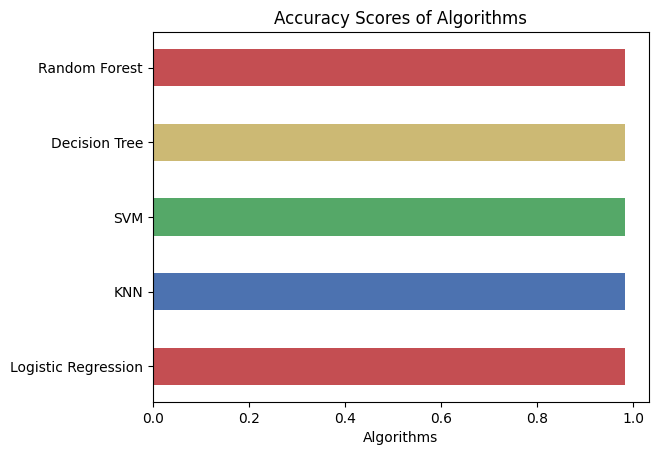

In [45]:
acc_list=[log_acc_test,knn_acc_test,svm_acc_test,dt_acc_test,rf_acc_test]
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = ('Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest')
y_pos = np.arange(len(objects))
performance = acc_list
width = 1/2
plt.barh(y_pos, performance, width,align='center', alpha=1, color='rbgy')
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Algorithms')
plt.show()

# Performance

In [46]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[59,  1],
       [ 0,  0]], dtype=int64)

In [47]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   0  1  All
True                 
0          59  1   60
All        59  1   60

# Find the Accuracy, Precision, Recall and F1-score

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.00      0.00      0.00         0

    accuracy                           0.98        60
   macro avg       0.50      0.49      0.50        60
weighted avg       1.00      0.98      0.99        60



c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# THANK YOU